# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 9 submission</b></u>

### Roster Name: Benjamin Wu
### Student ID: 013607880
### Email address: benjamin.wu01@sjsu.edu

##  <u>Solution</u>

## Import libraries, setup random seed

In [46]:
import numpy as np
import keras.datasets.fashion_mnist
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt

In [49]:
np.random.seed(42)

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

## Code the solution

In [16]:
(x_train_valid, y_train_valid), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [26]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=0)

In [50]:
input_shape = (28, 28, 1)

x_train = x_train.astype("float32") / 255
x_validation = x_validation.astype("float32") / 255
x_test = x_test.astype("float32") / 255


x_train = x_train.reshape(-1, 784)
x_validation = x_validation.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [33]:
input_layer = Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_layer, decoded)

encoder = keras.Model(input_layer, encoded)

encoded_input = keras.Input(shape=(32,))
decoder_layer = autoencoder.layers[-3]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [34]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
24/24 [==============================] - 2s 77ms/step - loss: 0.5751 - val_loss: 0.4652
Epoch 2/30
24/24 [==============================] - 2s 70ms/step - loss: 0.4238 - val_loss: 0.3924
Epoch 3/30
24/24 [==============================] - 2s 75ms/step - loss: 0.3770 - val_loss: 0.3676
Epoch 4/30
24/24 [==============================] - 2s 71ms/step - loss: 0.3571 - val_loss: 0.3497
Epoch 5/30
24/24 [==============================] - 2s 80ms/step - loss: 0.3417 - val_loss: 0.3401
Epoch 6/30
24/24 [==============================] - 2s 80ms/step - loss: 0.3313 - val_loss: 0.3278
Epoch 7/30
24/24 [==============================] - 2s 83ms/step - loss: 0.3239 - val_loss: 0.3283
Epoch 8/30
24/24 [==============================] - 2s 68ms/step - loss: 0.3198 - val_loss: 0.3190
Epoch 9/30
24/24 [==============================] - 2s 64ms/step - loss: 0.3154 - val_loss: 0.3159
Epoch 10/30
24/24 [==============================] - 2s 74ms/step - loss: 0.3129 - val_loss: 0.3139
Epoch 11/

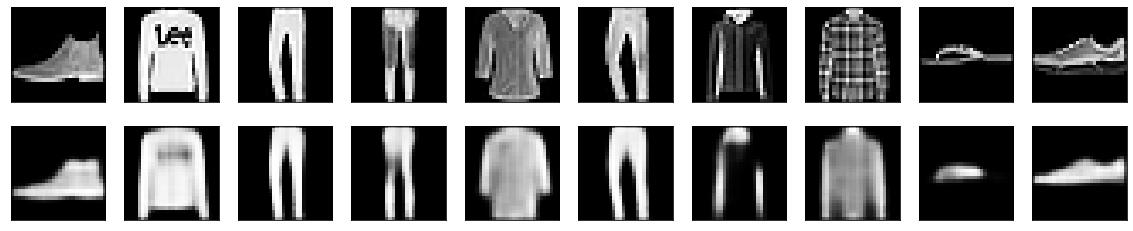

In [47]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [42]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_validation = x_validation.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_validation_noisy = x_validation + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_validation.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_validation_noisy = np.clip(x_validation_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [44]:
input_layer = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [45]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation_noisy, x_validation))

Epoch 1/30
24/24 [==============================] - 64s 3s/step - loss: 0.5423 - val_loss: 0.3825
Epoch 2/30
24/24 [==============================] - 63s 3s/step - loss: 0.3504 - val_loss: 0.3320
Epoch 3/30
24/24 [==============================] - 67s 3s/step - loss: 0.3259 - val_loss: 0.3192
Epoch 4/30
24/24 [==============================] - 61s 3s/step - loss: 0.3162 - val_loss: 0.3127
Epoch 5/30
24/24 [==============================] - 61s 3s/step - loss: 0.3114 - val_loss: 0.3097
Epoch 6/30
24/24 [==============================] - 67s 3s/step - loss: 0.3088 - val_loss: 0.3074
Epoch 7/30
24/24 [==============================] - 63s 3s/step - loss: 0.3068 - val_loss: 0.3058
Epoch 8/30
24/24 [==============================] - 65s 3s/step - loss: 0.3052 - val_loss: 0.3041
Epoch 9/30
24/24 [==============================] - 66s 3s/step - loss: 0.3039 - val_loss: 0.3033
Epoch 10/30
24/24 [==============================] - 66s 3s/step - loss: 0.3025 - val_loss: 0.3016
Epoch 11/30
24/24 [

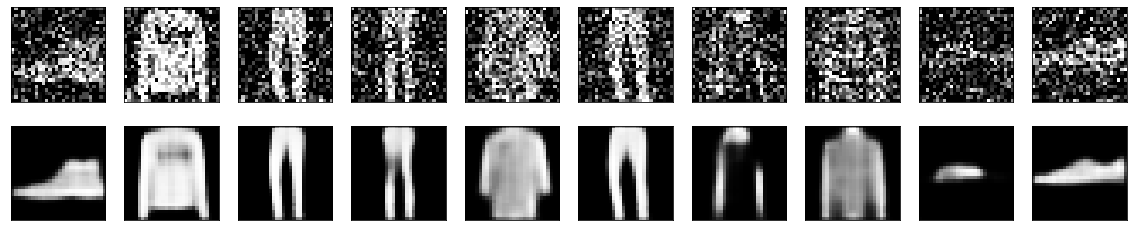

In [48]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()